Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'XEM'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,0.000458,0.000170,0.000400,0.000242,65525.0,0.000242
2015-04-01,0.000323,0.000227,0.000242,0.000314,28549.0,0.000314
2015-04-02,0.000330,0.000291,0.000309,0.000310,20678.0,0.000310
2015-04-03,0.000318,0.000251,0.000310,0.000277,23550.0,0.000277
2015-04-04,0.000283,0.000218,0.000272,0.000232,26800.0,0.000232
...,...,...,...,...,...,...
2021-06-21,0.111650,0.085698,0.106716,0.096004,103966535.0,0.096004
2021-06-22,0.116475,0.091621,0.096099,0.110979,78617810.0,0.110979
2021-06-23,0.118108,0.106082,0.112705,0.116910,50156327.0,0.116910


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2275 entries, 2015-03-31 to 2021-06-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2275 non-null   float64
 1   Low        2275 non-null   float64
 2   Open       2275 non-null   float64
 3   Close      2275 non-null   float64
 4   Volume     2275 non-null   float64
 5   Adj Close  2275 non-null   float64
 6   Spread     2275 non-null   float64
dtypes: float64(7)
memory usage: 142.2 KB


## Plot the closing value of NEM over time

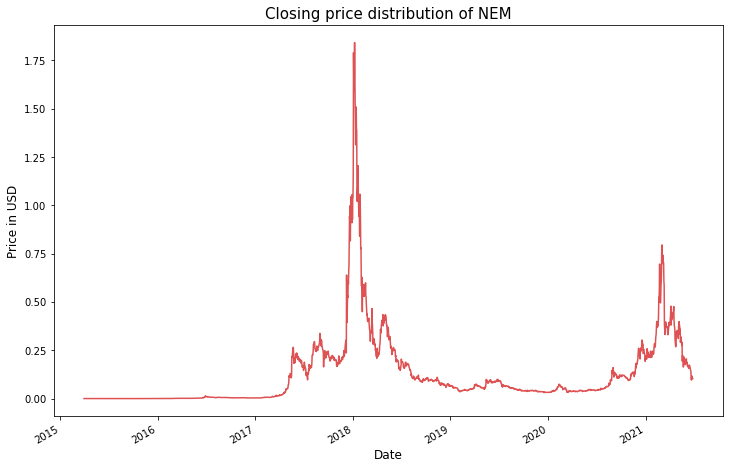

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of NEM", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,0.000458,0.000170,0.000400,0.000242,65525.0,0.000242
2015-04-01,0.000323,0.000227,0.000242,0.000314,28549.0,0.000314
2015-04-02,0.000330,0.000291,0.000309,0.000310,20678.0,0.000310
2015-04-03,0.000318,0.000251,0.000310,0.000277,23550.0,0.000277
2015-04-04,0.000283,0.000218,0.000272,0.000232,26800.0,0.000232
...,...,...,...,...,...,...
2021-06-21,0.111650,0.085698,0.106716,0.096004,103966535.0,0.096004
2021-06-22,0.116475,0.091621,0.096099,0.110979,78617810.0,0.110979
2021-06-23,0.118108,0.106082,0.112705,0.116910,50156327.0,0.116910


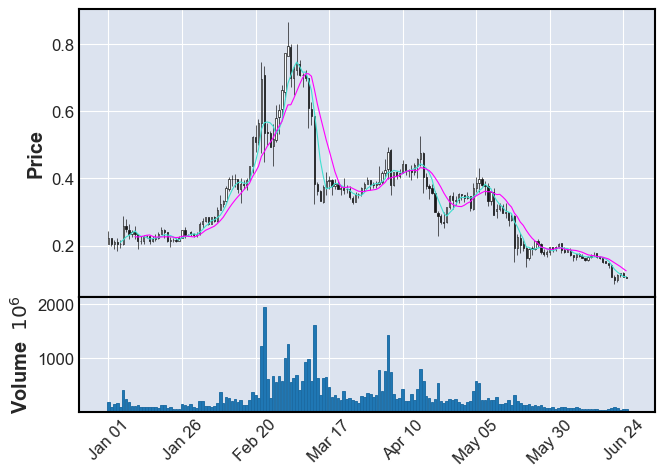

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
2099,2021-01-02,0.203206
2100,2021-01-03,0.210482
2101,2021-01-04,0.204813
2102,2021-01-05,0.205733
2103,2021-01-06,0.258289
...,...,...
2270,2021-06-21,0.096004
2271,2021-06-22,0.110979
2272,2021-06-23,0.116910
2273,2021-06-24,0.106095


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
200,2021-07-22,0.038979,-0.237490,0.356440
201,2021-07-23,0.033870,-0.272030,0.369628
202,2021-07-24,0.030550,-0.297975,0.388431
203,2021-07-25,0.028726,-0.309757,0.417598
204,2021-07-26,0.043378,-0.315785,0.443575


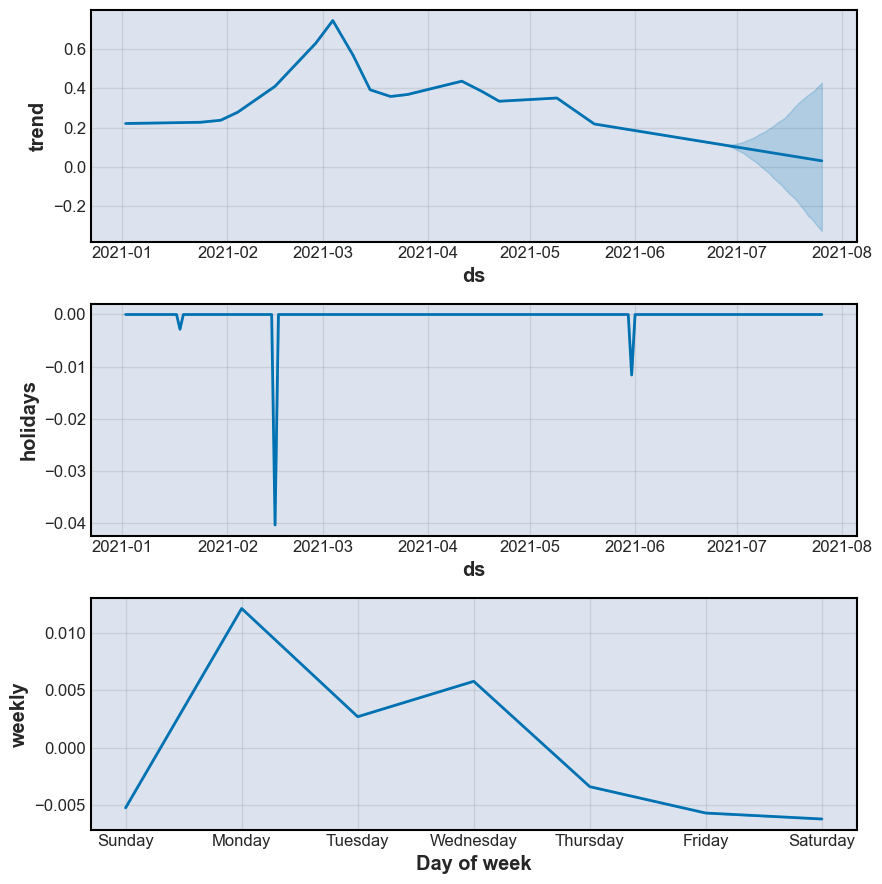

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

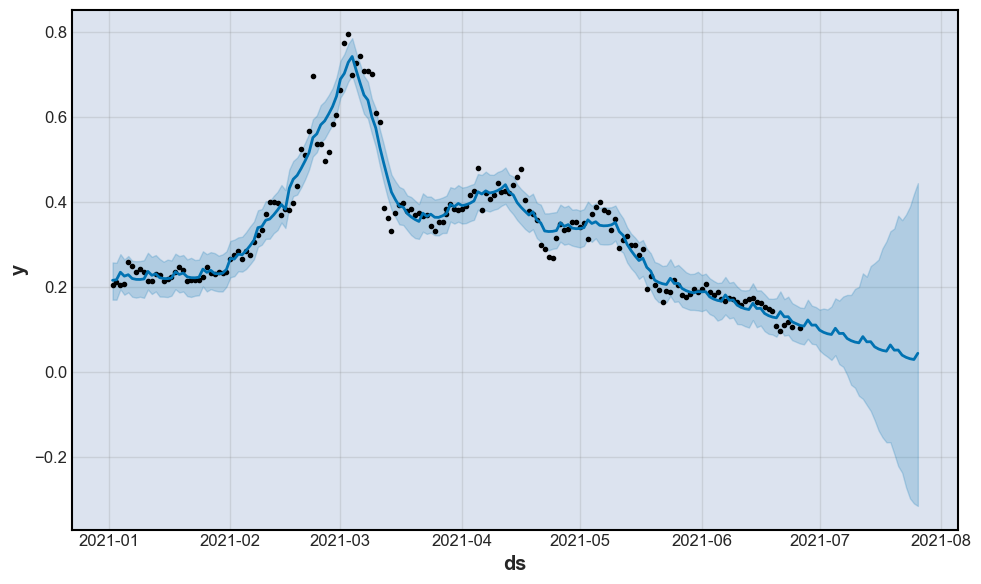

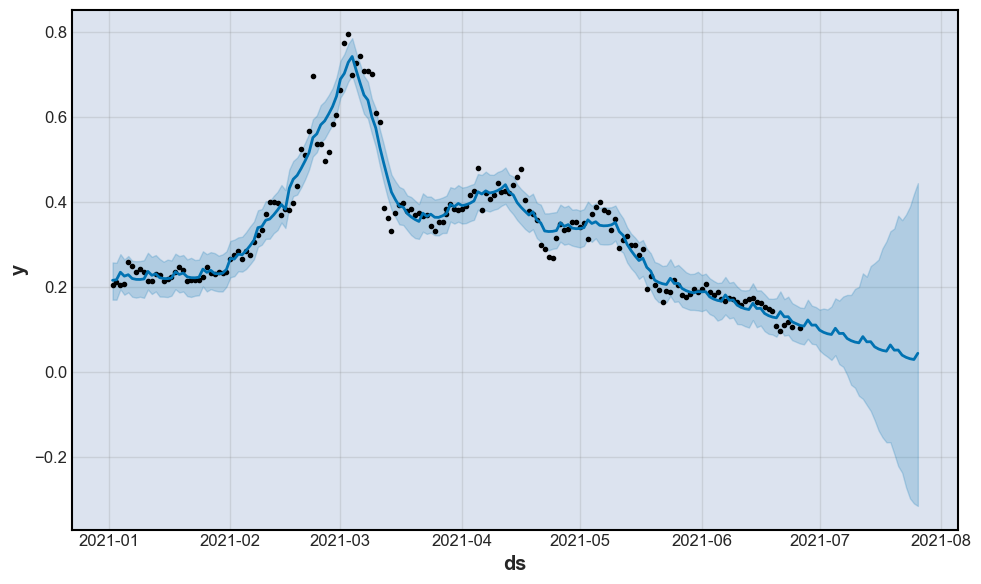

In [10]:
m.plot(forecast)